In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import alphavantage
import requests
import bs4 as bs
import yfinance as yf
import statistics
from pandas_datareader import data as pdr
import datetime
from statsmodels.tsa.stattools import coint, adfuller
import seaborn as sns; sns.set(style="whitegrid")
import seaborn

In [32]:
df = pd.read_csv("/Users/singularity/Super_Fast/returns_time.csv", header=None, usecols=[0,1,2],names=['Action','Net_Return','Time'])
df_1 = pd.read_csv("/Users/singularity/Super_Fast/new dat/returns_time.csv",header=None, usecols=[0,1,2],names=['Action','Net_Return','Time'])

In [34]:
df_1['Mean'] = df_1['Net_Return'].mean(axis=0)
df_1['STD'] = df_1['Net_Return'].std(axis=0)



In [4]:
df.head()


,Action,Net_Return,Time
0,buy,996120.0,1.651817e+09
1,sell,1000000.2,1.651817e+09
2,buy,996120.4,1.651817e+09
3,sell,1000000.2,1.651817e+09
4,buy,996120.2,1.651817e+09


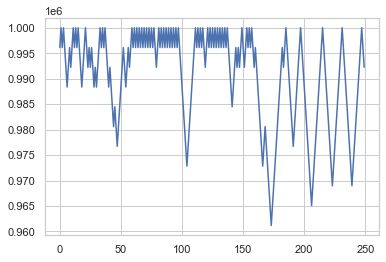

In [6]:
plt.plot(df['Net_Return'][0:250])

In [27]:
temp = []

for i in range(1,len(df)):
    #print(df['Time'][i] - df['Time'][i-1] )
    temp.append((df['Time'][i]/10) - (df['Time'][i-1]/10))
temp.insert(0,temp[0])

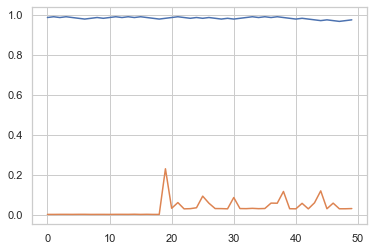

In [33]:
plt.plot((df['Net_Return'][0:50] / 1000000) - 0.01)
plt.plot(temp[0:50])

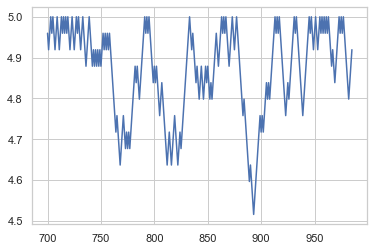

In [37]:
plt.plot(df_1['Net_Return'][700:1000]/100000)

In [43]:
temp = []
for i in range(1,len(df_1)):
    #print(df['Time'][i] - df['Time'][i-1] )
    temp.append((df['Time'][i]/1) - (df['Time'][i-1]/1))
temp.insert(0,temp[0])

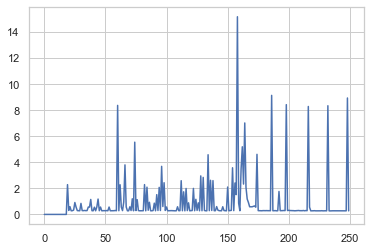

In [44]:
plt.plot(temp[0:250])

In [102]:
df_1['Rolling'] = df_1.Net_Return.rolling(4).mean()
numbers_series = pd.Series(temp)
windows = numbers_series.rolling(4).mean()


In [103]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

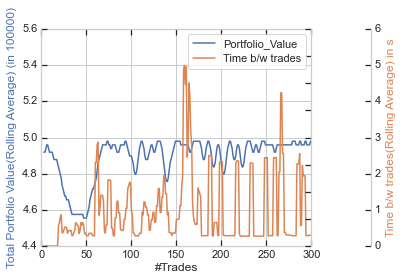

In [121]:
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
par1 = host.twinx()
par2 = host.twinx()
offset = 60
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))
par2.axis["right"].toggle(all=True)
par2.axis["right"].label.set_color(p3.get_color())
par2.set_ylabel("Time b/w trades(Rolling Average) in s")
host.set_xlim(0, 300)
host.set_ylim(4.4,5.6)
par1.set_ylim(0,16)
par2.set_ylim(0,6)
host.set_xlabel("#Trades")
host.set_ylabel("Total Portfolio Value(Rolling Average) (in 100000)")
par1.set_ylabel("Time between trades")
x = df_1['Rolling'] / 100000
p1, = host.plot((x),label='Portfolio_Value')
p2, = par2.plot(windows,label='Time b/w trades')
host.legend()
host.axis["left"].label.set_color(p1.get_color())
par2.axis["right"].label.set_color(p2.get_color())

plt.draw()
plt.show()


In [93]:
print(min(temp[0:250]))
print(max(temp[0:250]))

0.004224538803100586
15.173725843429565


In [100]:
df_1['Rolling'] = df_1.Net_Return.rolling(4).mean()
numbers_series = pd.Series(temp)
windows = numbers_series.rolling(4).mean()





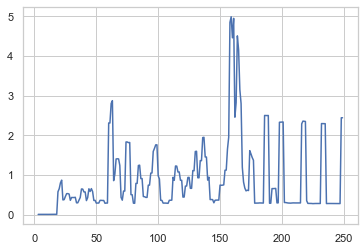

In [111]:
plt.plot(windows[0:250])